In [283]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

In [409]:
def PV(F:float=1000, C:float=100, r:float=0.1, time:int=30, delta_t=1):
    V_coupons = calc_coupons(C, r, time, delta_t)
    V_face = calc_f(F, r, time)
    # return sum(V_coupons) + V_face
    return V_coupons + V_face

def calc_f(F:float=1000, r:float=0.1, time:int=30):
    V_face = F/((1+r)**time)
    return V_face

def calc_coupons(C: float, r: float, time: int, delta_t:int):
    if r == 0:
        V_coupons = C*time
        return V_coupons
    V_coupons = C* (1-(1/(1+r)**time))/r
    return V_coupons

def calc_coupons1(C: float, r: float, time: int, delta_t:int):
    V_coupons = [0]
    for t in np.arange(0, time, delta_t):
        V_coupons.append(C/((1+r)**(t)))
    return np.cumsum(V_coupons)

def calc_coupons_exp(C: float, r: float, time: int, delta_t:int):
    PV = [0]
    for t in np.arange(0, time, delta_t):
        PV.append(C * np.exp(-r*t))
    return PV

def PV_exp(F=1000., C=100., r=0.1, time:int=30, delta_t=1.0):
    PV = 0
    for t in np.arange(0, time, delta_t):
        PV += C * np.exp(-r*t)
    PV += F*np.exp(-r*(time))
    return PV

In [430]:
def build_hist(array):
    n1 = int(1+3.3*np.log2(len(array)))
    bins = np.linspace((array.min()),(array.max()),n1)
    data = np.histogram(array, bins=bins)
    hist_dist = stats.rv_histogram(data)
    return hist_dist

def plot_chist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=True, density=True, facecolor=color, alpha=0.75)

def plot_hist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=False, density=False, facecolor=color, alpha=0.75)

In [431]:
print(PV(F=1000, C=100, r=0.1, time=5))
print(PV(F=1000, C=100, r=0.08, time=5))
print(PV(F=1000, C=100, r=0.12, time=5))

1000.0
1079.8542007415617
927.9044759530999


In [432]:
interest=pd.read_csv('interest_rates.csv')
main_int = np.array(interest['Total'])

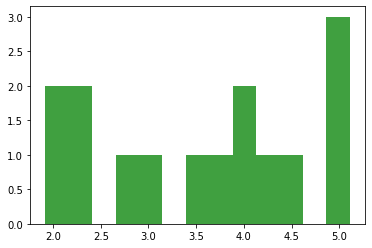

In [433]:
plot_hist(main_int)

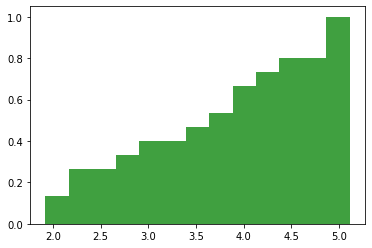

In [434]:
plot_chist(main_int)

In [370]:
int_hist=build_hist(main_int)
int_rates = []
for i in range(10000):
    sample = random.random()
    int_rates.append(int_hist.ppf(sample))
int_rates = np.array(int_rates)
pvs = []
for r in int_rates:
    pvs.append(PV(F=1000, C=100, r=r/100, time=10))
x = np.array(pvs)
print(x.mean())

1539.8460154803668


In [435]:
PV(F=1000, C=100, r=0.0, time=10)

ZeroDivisionError: float division by zero

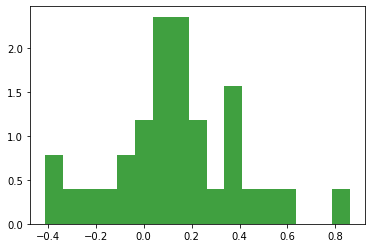

In [ ]:
stocks=pd.read_csv('stock_returns.csv')
SP = np.array(stocks['SP'])
DOW = np.array(stocks['DOW'])
NAS = np.array(stocks['Nasdaq'])
runs = 10000
plot_hist(NAS)
#plot_chist(SP, color='b')

In [361]:
SP_hist=build_hist(SP)
sp_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    sp_rates[i] = SP_hist.ppf(sample)
    samples[i] = SP_hist.cdf(sample)
pvs = []
test = []
for r in sp_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
    test.append(1000*(1+r)**10)
x = np.array(pvs)
test = np.array(test)
print(x.mean())

4152.797106100562


In [351]:
DOW_hist=build_hist(DOW)
dow_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    dow_rates[i] = (DOW_hist.ppf(sample))
    samples[i] = DOW_hist.cdf(sample)
pvs = []
for r in dow_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
x = np.array(pvs)
print(x.mean())

3151.5477546093844


In [350]:
NAS_hist=build_hist(NAS)
nas_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    nas_rates[i] = NAS_hist.ppf(sample)
    samples[i] = NAS_hist.cdf(sample)
pvs = []
for r in nas_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
x = np.array(pvs)
print(x.mean())

11167.559389504046


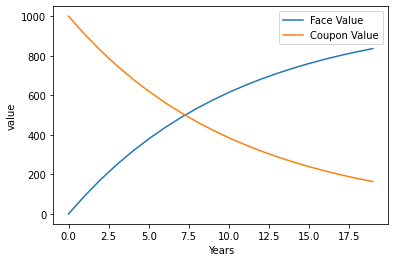

In [427]:
m = []
m3 = []
ran = np.arange(0, 20, 1)
for r in ran:
    m.append(calc_coupons(C=100, r=0.1, time=r, delta_t=1))
    m3.append(calc_f(F=1000, r=0.1, time=r))
plt.xlabel('Years')
plt.ylabel('value')
plt.plot(ran, m, label="Face Value")
plt.plot(ran, m3, label='Coupon Value')
plt.legend()

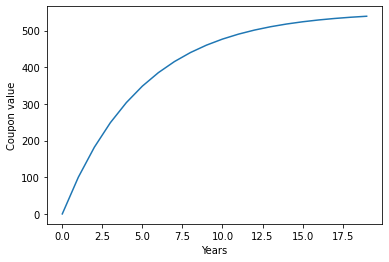

In [424]:
ran1 = np.arange(0, 20, 1)
m1 = np.cumsum(calc_coupons_exp(C=100, r=0.2, time=19, delta_t=1))
plt.xlabel('Years')
plt.ylabel('Coupon value')
plt.plot(ran1, m1)

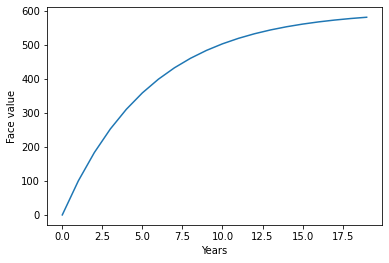

In [418]:
m2 = calc_coupons1(C=100, r=0.2, time=19, delta_t=1)
plt.xlabel('Years')
plt.ylabel('Face value')
plt.plot(ran, m2)